## Exploratory Data Analysis
![EDA-in-python](https://cdn.activestate.com/wp-content/uploads/2019/08/exploratory-data-analysis-using-python-blog-hero.jpg)

Second step of an analytics project is to perfrom Exploratory Analysis so that we can 
1. Observe trends and relationships between factors/variables to better understand the dataset
2. Identify any missing values, outliers, and other anomalies

In [86]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import split
sb.set_theme()

# Import Cleaned dataset into the notebook

In [87]:
heart_atk_df = pd.read_csv('datasets/heart_attack_cleaned.csv')
heart_atk_clean_df = pd.read_csv('datasets/heart_attack_cleaned_text.csv')

In [88]:
heart_atk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      302 non-null    int64  
 1   sex                      302 non-null    int64  
 2   chest_pain               302 non-null    int64  
 3   resting_blood_pressure   302 non-null    int64  
 4   chol                     302 non-null    int64  
 5   fasting_blood_sugar      302 non-null    int64  
 6   rest_ecg                 302 non-null    int64  
 7   max_heart_rate           302 non-null    int64  
 8   exercise_induced_angina  302 non-null    int64  
 9   num_of_major_vessels     302 non-null    int64  
 10  heart_attack_chance      302 non-null    int64  
 11  o2_saturation            302 non-null    float64
dtypes: float64(1), int64(11)
memory usage: 28.4 KB


In [89]:
heart_atk_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      302 non-null    int64  
 1   sex                      302 non-null    object 
 2   chest_pain               302 non-null    object 
 3   resting_blood_pressure   302 non-null    int64  
 4   chol                     302 non-null    int64  
 5   fasting_blood_sugar      302 non-null    bool   
 6   rest_ecg                 302 non-null    object 
 7   max_heart_rate           302 non-null    int64  
 8   exercise_induced_angina  302 non-null    object 
 9   num_of_major_vessels     302 non-null    int64  
 10  heart_attack_chance      302 non-null    object 
 11  o2_saturation            302 non-null    float64
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 26.4+ KB


Need to reorder columns

In [90]:
cols = heart_atk_df.columns.tolist()
cols = cols[:-2] + cols[-1:] + cols[-2:-1]
heart_atk_df =  heart_atk_df[cols]
heart_atk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      302 non-null    int64  
 1   sex                      302 non-null    int64  
 2   chest_pain               302 non-null    int64  
 3   resting_blood_pressure   302 non-null    int64  
 4   chol                     302 non-null    int64  
 5   fasting_blood_sugar      302 non-null    int64  
 6   rest_ecg                 302 non-null    int64  
 7   max_heart_rate           302 non-null    int64  
 8   exercise_induced_angina  302 non-null    int64  
 9   num_of_major_vessels     302 non-null    int64  
 10  o2_saturation            302 non-null    float64
 11  heart_attack_chance      302 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.4 KB


In [91]:
cols = heart_atk_clean_df.columns.tolist()
cols = cols[:-2] + cols[-1:] + cols[-2:-1]
heart_atk_clean_df =  heart_atk_clean_df[cols]
heart_atk_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      302 non-null    int64  
 1   sex                      302 non-null    object 
 2   chest_pain               302 non-null    object 
 3   resting_blood_pressure   302 non-null    int64  
 4   chol                     302 non-null    int64  
 5   fasting_blood_sugar      302 non-null    bool   
 6   rest_ecg                 302 non-null    object 
 7   max_heart_rate           302 non-null    int64  
 8   exercise_induced_angina  302 non-null    object 
 9   num_of_major_vessels     302 non-null    int64  
 10  o2_saturation            302 non-null    float64
 11  heart_attack_chance      302 non-null    object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 26.4+ KB


# 2. HeartAttack EDA

<AxesSubplot:xlabel='heart_attack_chance', ylabel='count'>

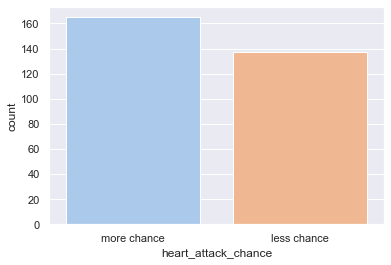

In [92]:
sb.countplot(data = heart_atk_clean_df, x ='heart_attack_chance', palette='pastel')

From the above plot, we can see that the dataset has a good balance for both options for heart_attack chance.

In [118]:
heart_atk_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      302 non-null    int64  
 1   sex                      302 non-null    object 
 2   chest_pain               302 non-null    object 
 3   resting_blood_pressure   302 non-null    int64  
 4   chol                     302 non-null    int64  
 5   fasting_blood_sugar      302 non-null    bool   
 6   rest_ecg                 302 non-null    object 
 7   max_heart_rate           302 non-null    int64  
 8   exercise_induced_angina  302 non-null    object 
 9   num_of_major_vessels     302 non-null    int64  
 10  o2_saturation            302 non-null    float64
 11  heart_attack_chance      302 non-null    object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 26.4+ KB


The `heart_atk_clean_df` dataset contains 
4 continuous predictor variables:
- age
- resting_blood_pressure
- chol
- max_heart_rate
- o2_saturation

6 categorical predictor variables:
- sex
- chest_pain
- fasting_blood_sugar
- rest_ecg
- exercise_induced_angina
- num_of_major_vessels

And 1 categorical response variable:
- heart_attack_chance

In [93]:
numeric_features=['age', 'resting_blood_pressure', 'chol', 'max_heart_rate']
categorical_features=['sex', 'chest_pain', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'num_of_major_vessels', 'thal_rate']

## 2.1 HeartAttack - Continuous Variables
- `Continuous`: age, resting_blood_pressure, chol, max_heart_rate

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, a

Text(0.5, 1.03, 'Distribution of Continuous Variables')

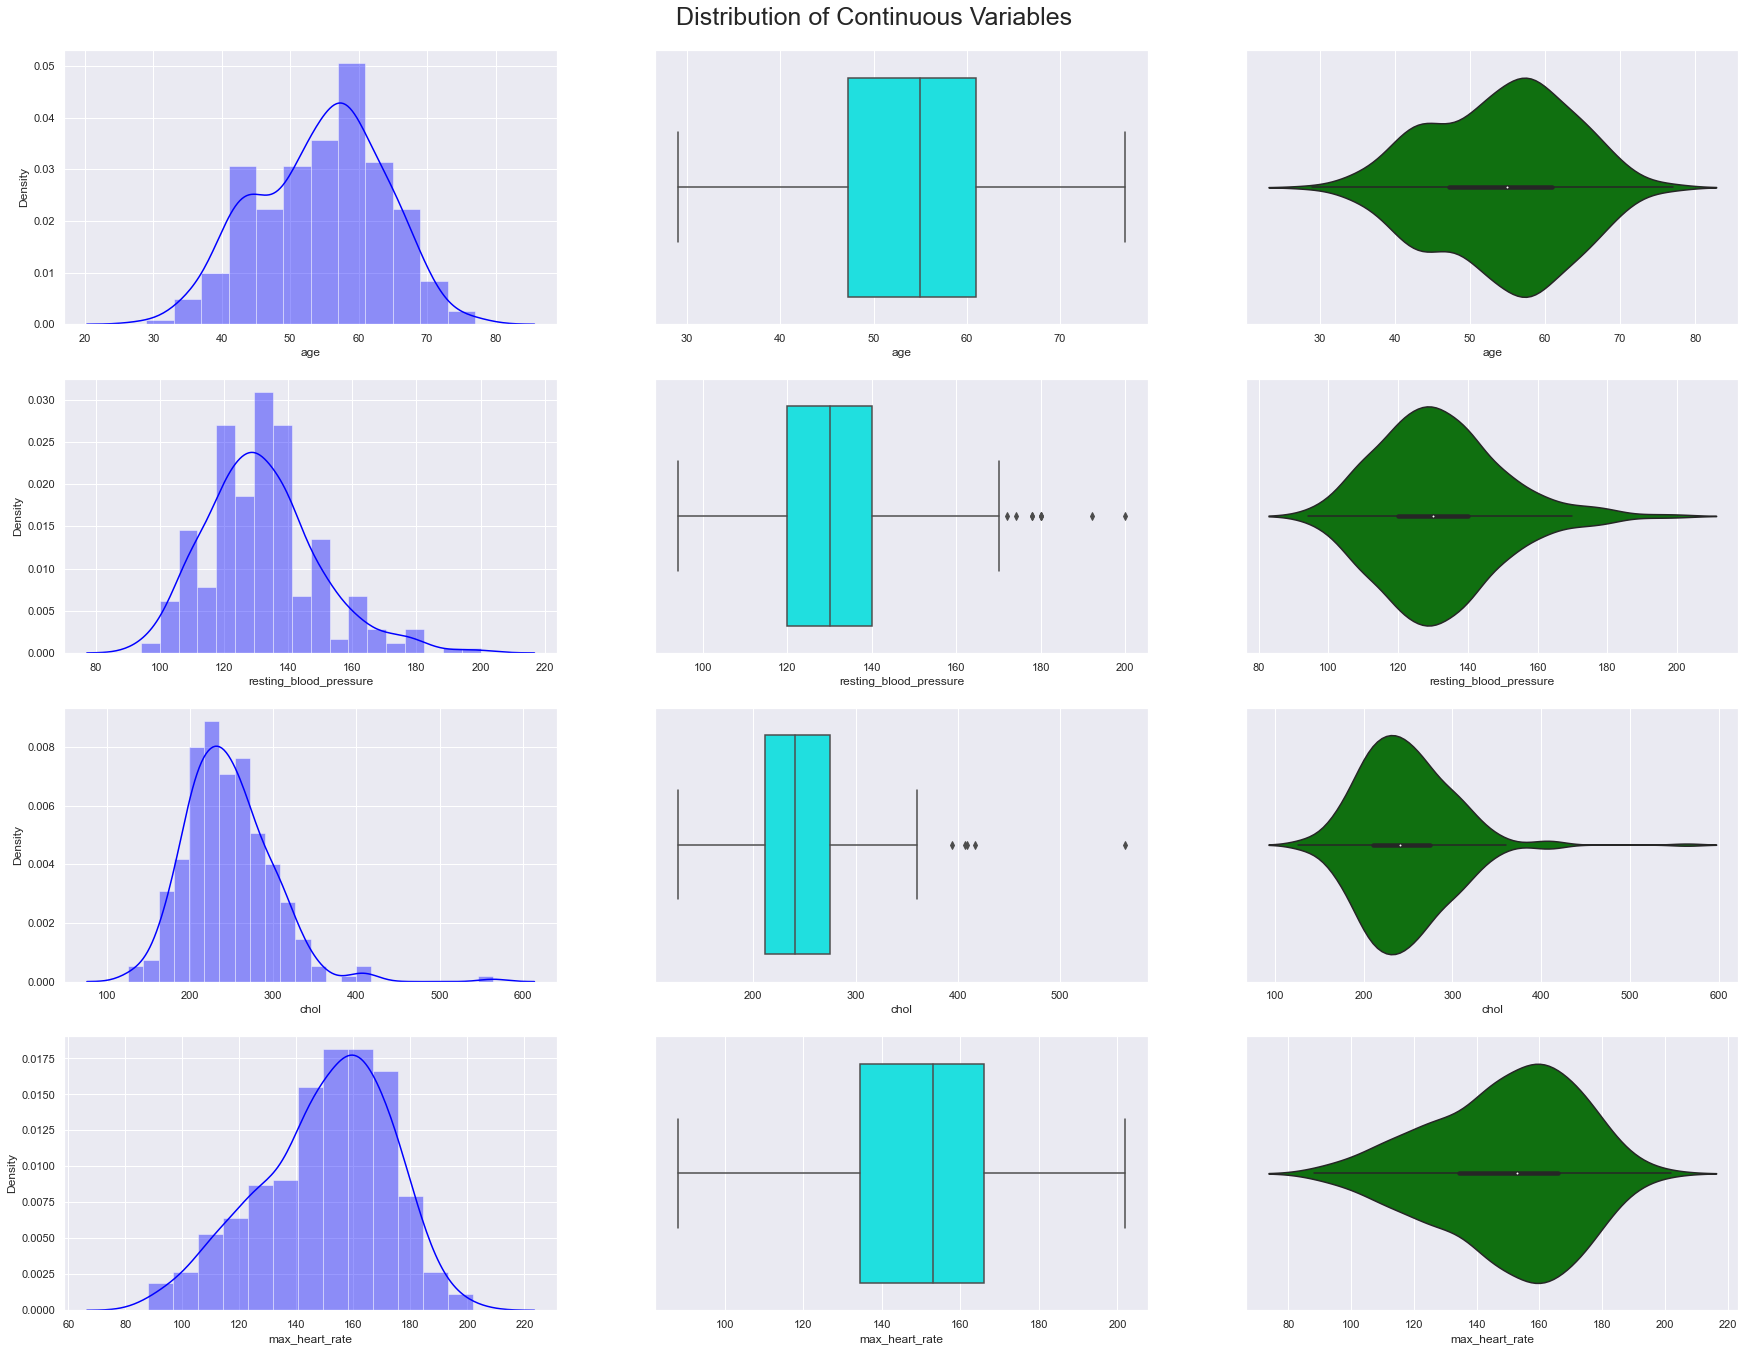

In [117]:
fig,ax = plt.subplots(int(len(numeric_features)),3,figsize=(30,20))
for index,i in enumerate(numeric_features):
    sb.distplot(heart_atk_clean_df[i],ax=ax[index,0],color='blue')
    sb.boxplot(heart_atk_clean_df[i],ax=ax[index,1],color='cyan')
    sb.violinplot(heart_atk_clean_df[i],ax=ax[index,2],color='green')
    
#fig.tight_layout()
fig.subplots_adjust(top=1)
plt.suptitle("Distribution of Continuous Variables", y=1.03,fontsize=25)

- The distributions of the continuous variables are all quite similar to Normal Distributions

### 2.1.1 HeartAttack - Continuous Variables - `age`

In [95]:
heart_atk_clean_df['age'].describe()

count    302.000000
mean      54.324503
std        9.067887
min       29.000000
25%       47.250000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='heart_attack_chance'>

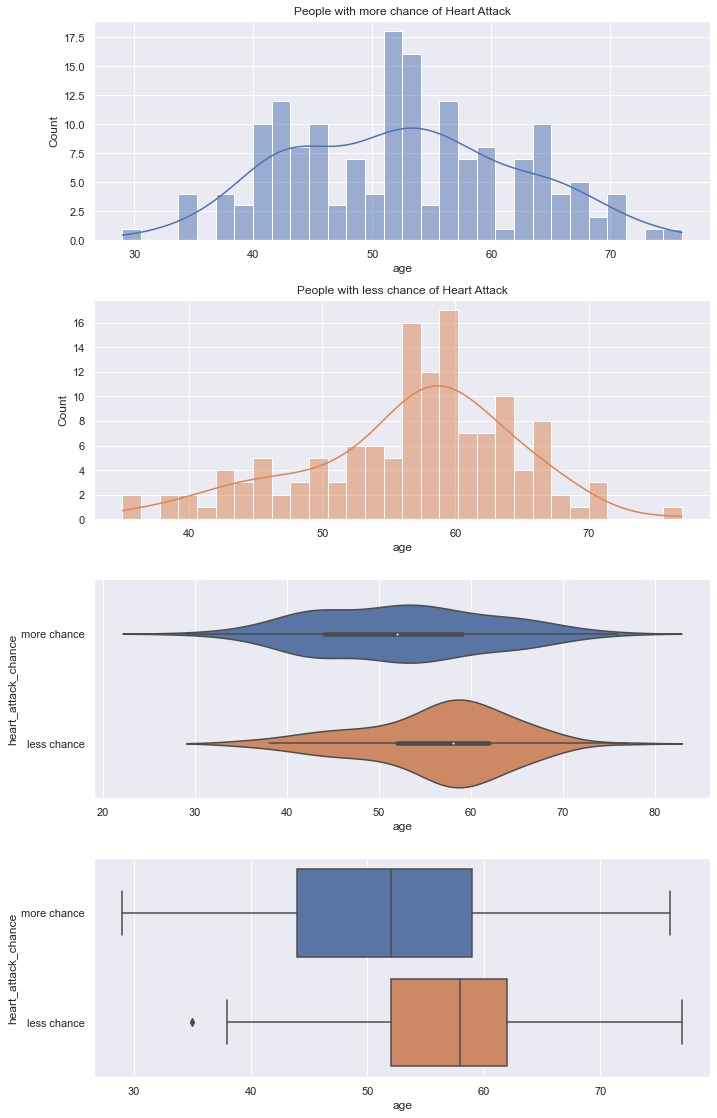

In [123]:
fig,ax = plt.subplots(4,1,figsize=(10,16))
sb.set(style="darkgrid")
fig.tight_layout(pad=3.0)

sb.histplot(x='age', data=heart_atk_clean_df[heart_atk_df["heart_attack_chance"]==1], color="#4c72b0", ax=ax[0], bins=30, kde = True).set_title('People with more chance of Heart Attack')
sb.histplot(x='age', data=heart_atk_clean_df[heart_atk_df["heart_attack_chance"]==0], color="#dd8452", ax=ax[1], bins=30, kde = True).set_title('People with less chance of Heart Attack')
sb.violinplot(x='age',y='heart_attack_chance', split=True, data=heart_atk_clean_df, ax=ax[2])
sb.boxplot(x='age',y='heart_attack_chance', data=heart_atk_clean_df, ax=ax[3]) 

- The distribution of age among people with less and more chance of Heart Attack are similar.
- A slight difference at the end of the distribution with more people with less chance of Heart Attack having a higher age.

### 2.1.2 HeartAttack - Continuous Variables - `resting_blood_pressure`

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='heart_attack_chance'>

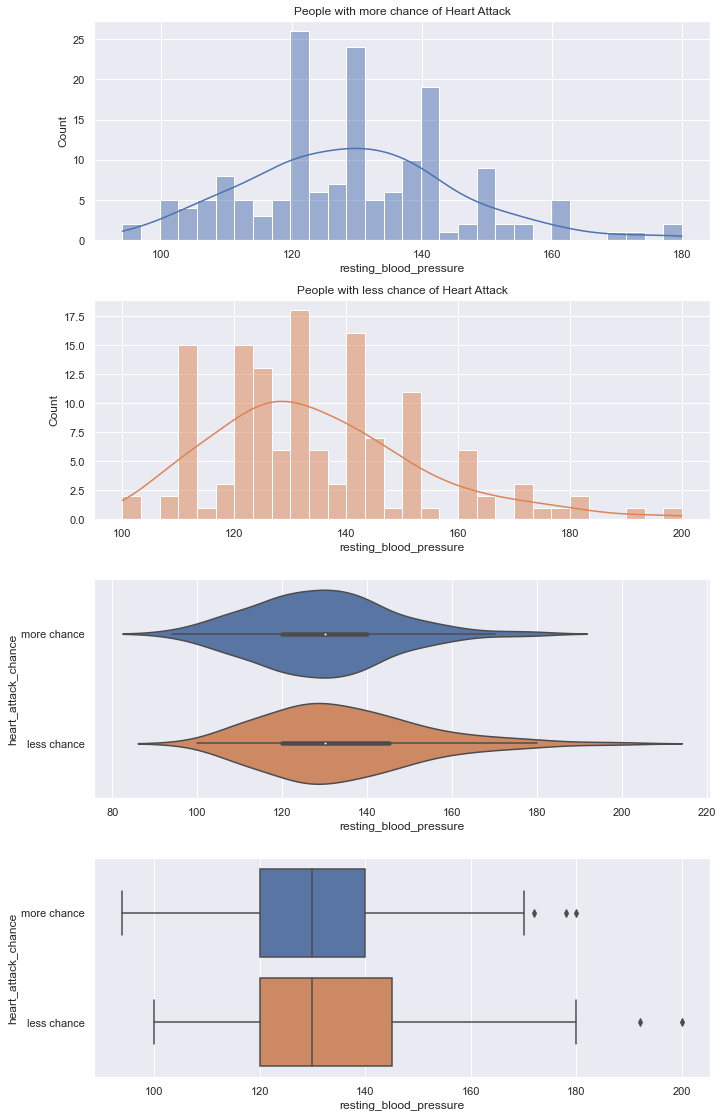

In [124]:
fig,ax = plt.subplots(4,1,figsize=(10,16))
sb.set(style="darkgrid")
fig.tight_layout(pad=3.0)

sb.histplot(x='resting_blood_pressure', data=heart_atk_clean_df[heart_atk_df["heart_attack_chance"]==1], color="#4c72b0", ax=ax[0], bins=30, kde = True).set_title('People with more chance of Heart Attack')
sb.histplot(x='resting_blood_pressure', data=heart_atk_clean_df[heart_atk_df["heart_attack_chance"]==0], color="#dd8452", ax=ax[1], bins=30, kde = True).set_title('People with less chance of Heart Attack')
sb.violinplot(x='resting_blood_pressure',y='heart_attack_chance', split=True, data=heart_atk_clean_df, ax=ax[2])
sb.boxplot(x='resting_blood_pressure',y='heart_attack_chance', data=heart_atk_clean_df, ax=ax[3])

- The distribution of resting blood pressure among people with less and more chance of Heart Attack are similar.
- Less chance of heart attack has a higher interquartile range.

### 2.1.3 HeartAttack - Continuous Variables - `chol`
- cholestoral in mg/dl fetched via BMI sensor

<AxesSubplot:xlabel='chol', ylabel='heart_attack_chance'>

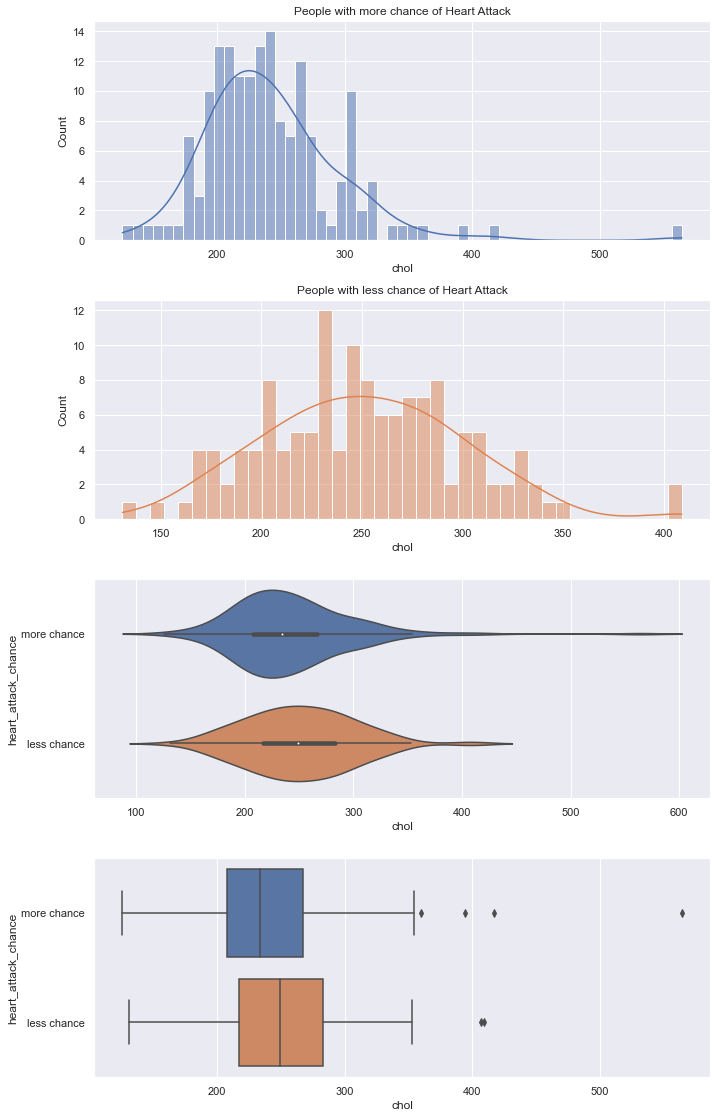

In [127]:
fig,ax = plt.subplots(4,1,figsize=(10,16))
sb.set(style="darkgrid")
fig.tight_layout(pad=3.0)

sb.histplot(data=heart_atk_clean_df[heart_atk_df["heart_attack_chance"] == 1], x="chol", ax=ax[0], kde=True, bins=55, color="#4c72b0").set_title('People with more chance of Heart Attack')
sb.histplot(data=heart_atk_clean_df[heart_atk_df["heart_attack_chance"] == 0], x="chol", ax=ax[1], kde=True, bins=40, color="#dd8452").set_title('People with less chance of Heart Attack')
sb.violinplot(x='chol',y='heart_attack_chance', split=True, data=heart_atk_clean_df, ax=ax[2])
sb.boxplot(x='chol',y='heart_attack_chance', data=heart_atk_clean_df, ax=ax[3])


- The distributions of chol of people with less and more chance of Heart Attack are different, with less chance having a higher mean and interquartile range.
- This means that those with less chance of Heart Attack have a higher cholestoral level.

### 2.1.4 HeartAttack - Continuous Variables - `max_heart_rate`
- maximum heart rate achieved

<AxesSubplot:xlabel='max_heart_rate', ylabel='heart_attack_chance'>

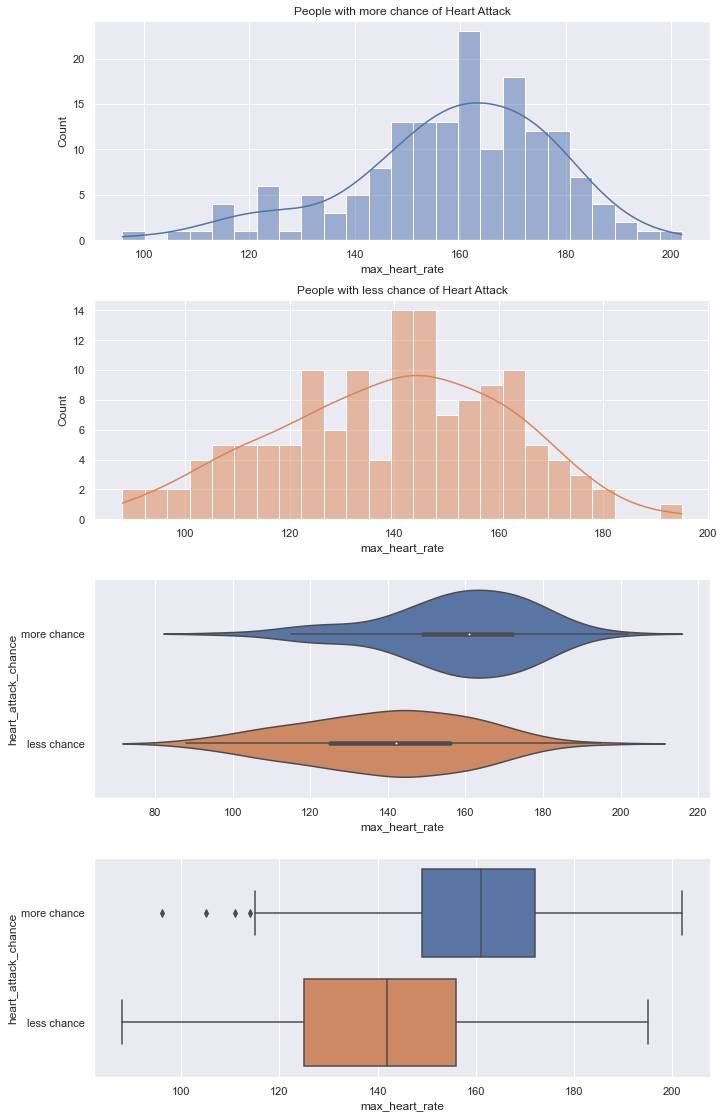

In [132]:
fig,ax = plt.subplots(4,1,figsize=(10,16))
sb.set(style="darkgrid")
fig.tight_layout(pad=3.0)

sb.histplot(data=heart_atk_clean_df[heart_atk_df["heart_attack_chance"] == 1], x="max_heart_rate", ax=ax[0], kde=True, bins=25, color="#4c72b0").set_title('People with more chance of Heart Attack')
sb.histplot(data=heart_atk_clean_df[heart_atk_df["heart_attack_chance"] == 0], x="max_heart_rate", ax=ax[1], kde=True, bins=30, color="#dd8452").set_title('People with less chance of Heart Attack')
sb.violinplot(x='max_heart_rate',y='heart_attack_chance', split=True, data=heart_atk_clean_df, ax=ax[2])
sb.boxplot(x='max_heart_rate',y='heart_attack_chance', data=heart_atk_clean_df, ax=ax[3])


- The distributions of max_heart_rate of people with less and more chance of Heart Attack are different, with less chance having a lower mean and higher interquartile range.
- This means that those with less chance of Heart Attack have a lower max_heart_rate level.

### 2.1.5 HeartAttack - Continuous Variables - `o2_saturation`
- Saturation Level

<AxesSubplot:xlabel='o2_saturation', ylabel='heart_attack_chance'>

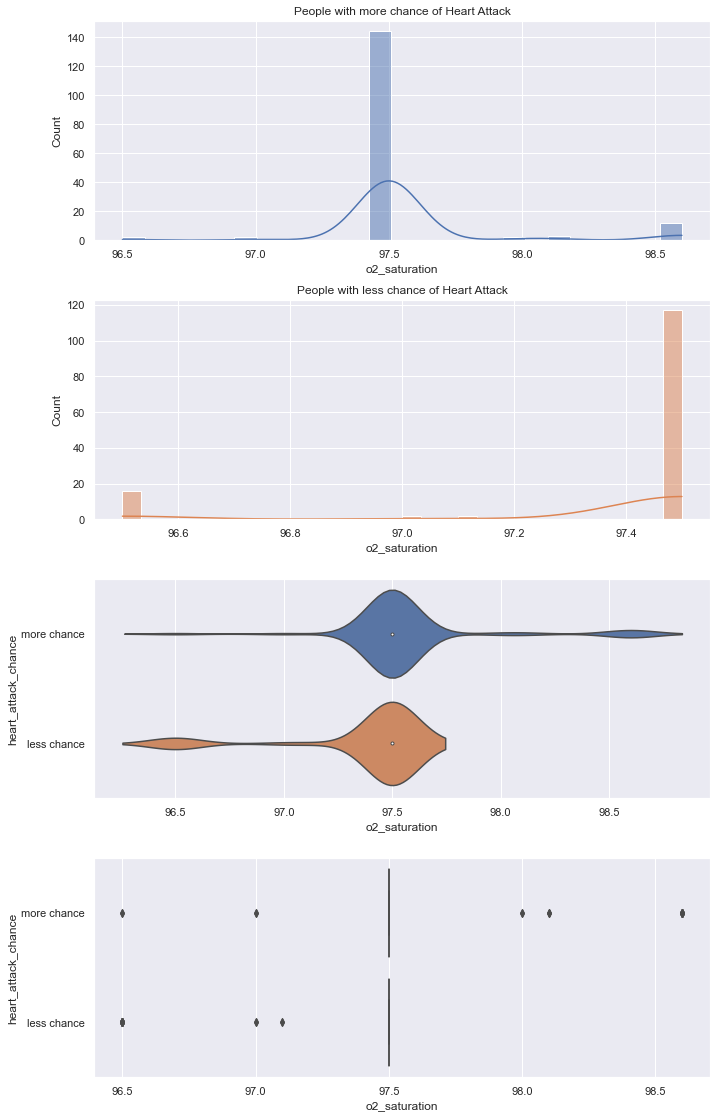

In [134]:
fig,ax = plt.subplots(4,1,figsize=(10,16))
sb.set(style="darkgrid")
fig.tight_layout(pad=3.0)

sb.histplot(data=heart_atk_clean_df[heart_atk_df["heart_attack_chance"] == 1], x="o2_saturation", ax=ax[0], kde=True, bins=25, color="#4c72b0").set_title('People with more chance of Heart Attack')
sb.histplot(data=heart_atk_clean_df[heart_atk_df["heart_attack_chance"] == 0], x="o2_saturation", ax=ax[1], kde=True, bins=30, color="#dd8452").set_title('People with less chance of Heart Attack')
sb.violinplot(x='o2_saturation',y='heart_attack_chance', split=True, data=heart_atk_clean_df, ax=ax[2])
sb.boxplot(x='o2_saturation',y='heart_attack_chance', data=heart_atk_clean_df, ax=ax[3])


### 2.1.5 HeartAttack - Continuous Variables - `heart_rates(max)` & `chol` & `pressure` VS `age`

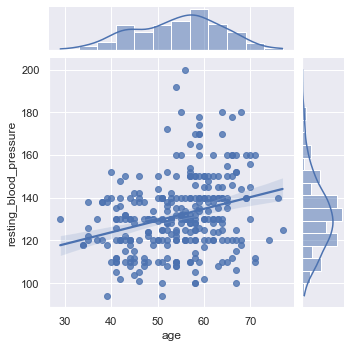

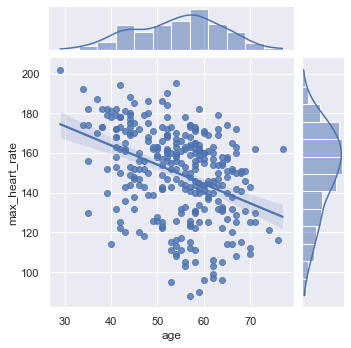

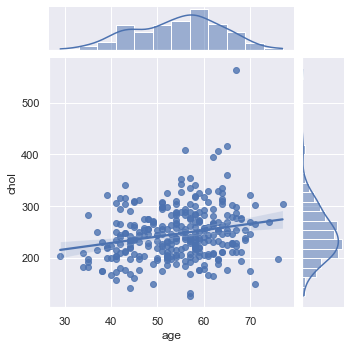

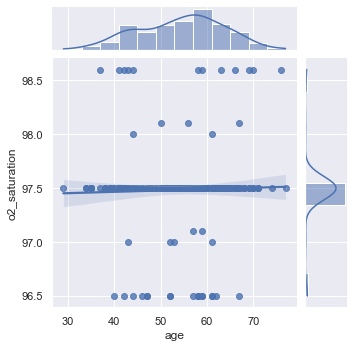

In [135]:
sb.jointplot(x = heart_atk_clean_df['age'], y = heart_atk_clean_df['resting_blood_pressure'], kind = 'reg', height=5)

sb.jointplot(x = heart_atk_clean_df['age'], y = heart_atk_clean_df['max_heart_rate'], kind = 'reg', height=5)

sb.jointplot(x = heart_atk_clean_df['age'], y = heart_atk_clean_df['chol'], kind = 'reg', height=5)

sb.jointplot(x = heart_atk_clean_df['age'], y = heart_atk_clean_df['o2_saturation'], kind = 'reg', height=5)

- It can be seen that there is not much of a linear relationship between `blood pressure` and `o2_saturation` with `age`, while `heart rate` and `chol` show a pronounced linear relationship with `age`.

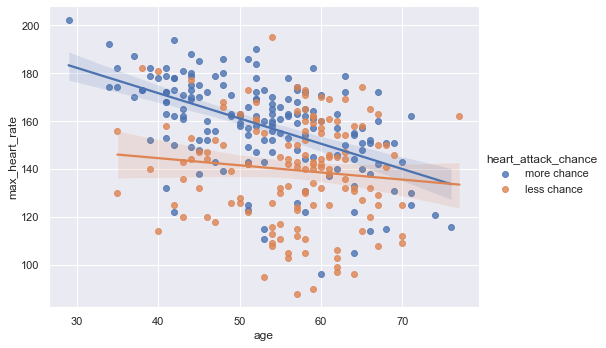

In [101]:
ax = sb.lmplot(x = 'age', y = 'max_heart_rate', data = heart_atk_clean_df, hue = 'heart_attack_chance', height=5, aspect=1.4)


1. `age` and `max_heart_rate` demonstrate an apparent negative correlation relationship. People tend to have a higher maximum heart rate when they are young, and the maximum heart rate will drop as they age.
2. People prone to heart disease have a relatively high heart rate when they are young.
3. Those not prone to heart disease have little change in their maximum heart rate throughout their lives. However, those prone to heart disease have extremely high declines in maximum heart rate.

## 2.2 HeartAttack - Categorical Variables
- `Categorical`: sex, chest_pain, fasting_blood_sugar, rest_ecg, exercise_induced_angina, num_of_major_vessels, thal_rate

In [102]:
# helper function to show percentage when plotting categorical variables with cardio
def plotCatVar(x, uniques_values):
    temp = heart_atk_clean_df[heart_atk_clean_df[x] != '0']
    ax = sb.countplot(x = temp[x], hue = temp['heart_attack_chance'], palette="coolwarm_r")

    total = len(temp[x])
    ind = 0
    for p in ax.patches:
        if ind<uniques_values == 0:
            total = ax.patches[ind].get_height() + ax.patches[ind+uniques_values].get_height()
        else:
            total = ax.patches[ind].get_height() + ax.patches[ind-uniques_values].get_height()
        percentage = f'{100 * ax.patches[ind].get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
        ind = ind+1
    plt.tight_layout()
    plt.show()

### 2.2.1 HeartAttack - Categorical Variables - `sex`

<AxesSubplot:xlabel='sex', ylabel='count'>

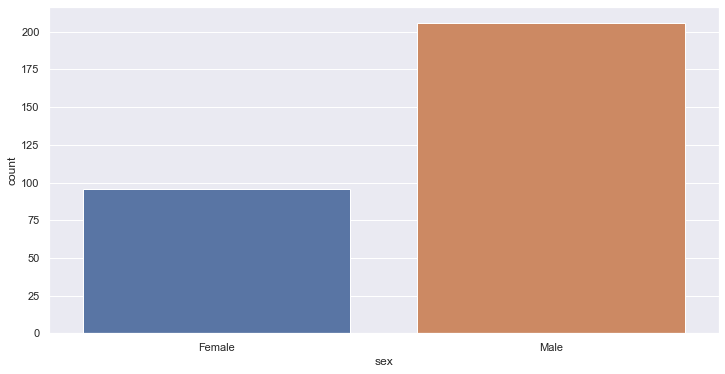

In [103]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
sb.countplot(x='sex',data=heart_atk_clean_df, order = sorted(list(set(heart_atk_clean_df['sex']))))

- There are double Males compared to Females. 

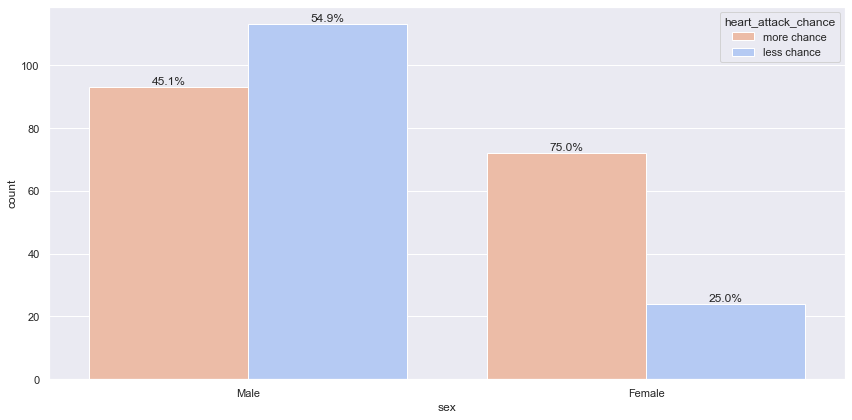

In [104]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
plotCatVar('sex',2)

- Females have a higher chances of having a Heart Attack as compared to Males

### 2.2.2 HeartAttack - Categorical Variables - `chest_pain`

<AxesSubplot:xlabel='chest_pain', ylabel='count'>

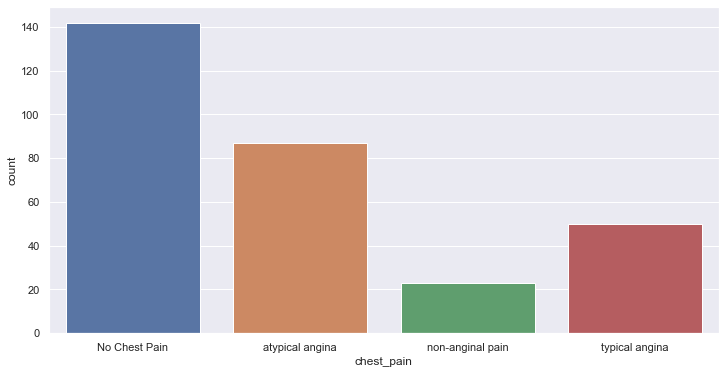

In [105]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
sb.countplot(x='chest_pain',data=heart_atk_clean_df, order = sorted(list(set(heart_atk_clean_df['chest_pain']))))

- The distribution of the chest pain outcomes are not evenly distributed

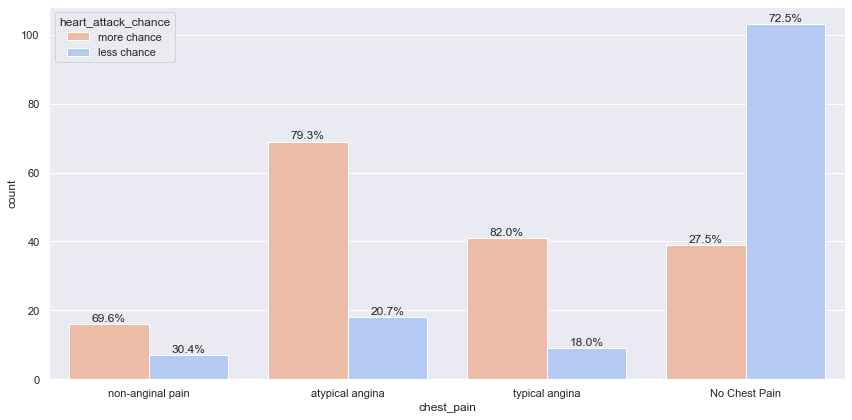

In [106]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
plotCatVar('chest_pain',4)

- If someone has chest pain, the chances of them having a heart attack is over 69%
- The type of chest pain that results in a the highest chance of heart attack would be atypical anigna followed by typical angina and non-anginal  

### 2.2.3 HeartAttack - Categorical Variables - `fasting_blood_sugar`
- (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

<AxesSubplot:xlabel='fasting_blood_sugar', ylabel='count'>

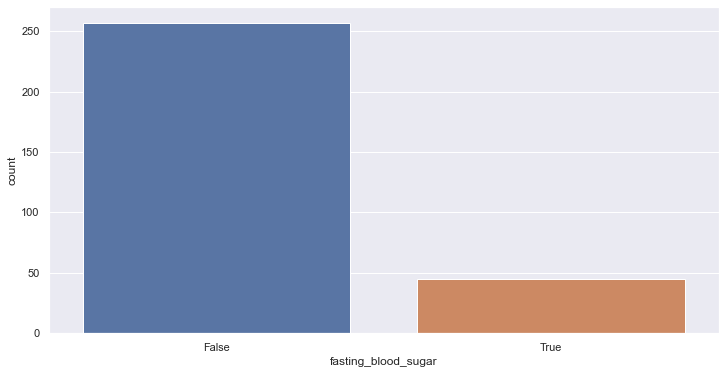

In [107]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
sb.countplot(x='fasting_blood_sugar',data=heart_atk_clean_df, order = sorted(list(set(heart_atk_clean_df['fasting_blood_sugar']))))

- The distribution of the fasting blood sugar outcomes are not evenly distributed with more people having a fasting blood sugar level of more than 120 mg/dl

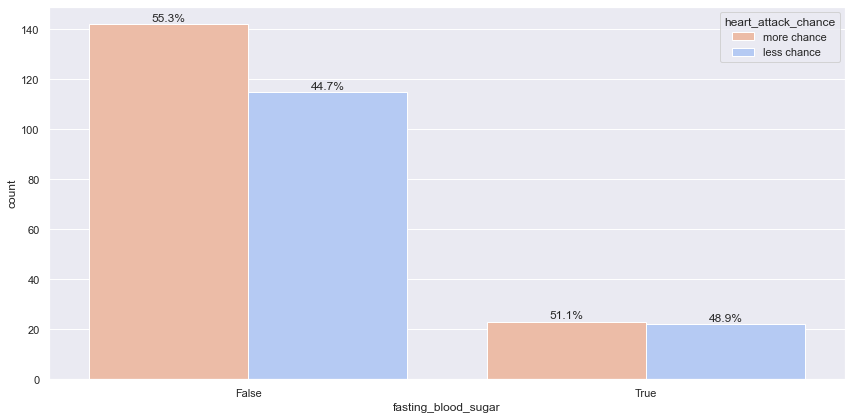

In [108]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
plotCatVar('fasting_blood_sugar',2)

- Those without fasting blood sugar levels have a slightly higher chance of having a heart attack

### 2.2.4 HeartAttack - Categorical Variables - `rest_ecg`
- resting electrocardiographic results

<AxesSubplot:xlabel='rest_ecg', ylabel='count'>

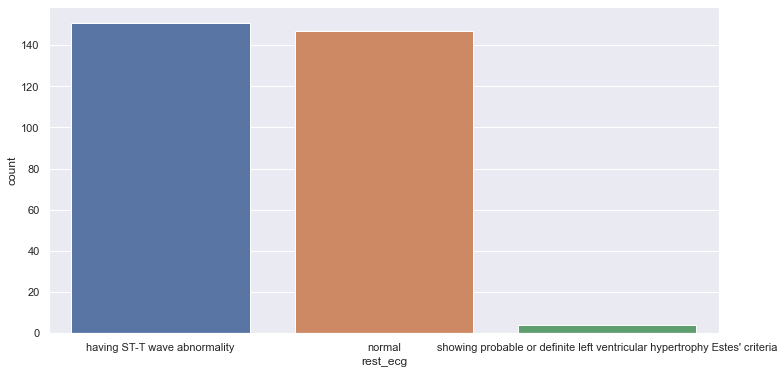

In [109]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
sb.countplot(x='rest_ecg',data=heart_atk_clean_df, order = sorted(list(set(heart_atk_clean_df['rest_ecg']))))

- The distribution of the resting electrocardiographic results are quite evenly distributed except for the outcome "showing probable or definite left ventricular hypertrophy by Estes' criteria"

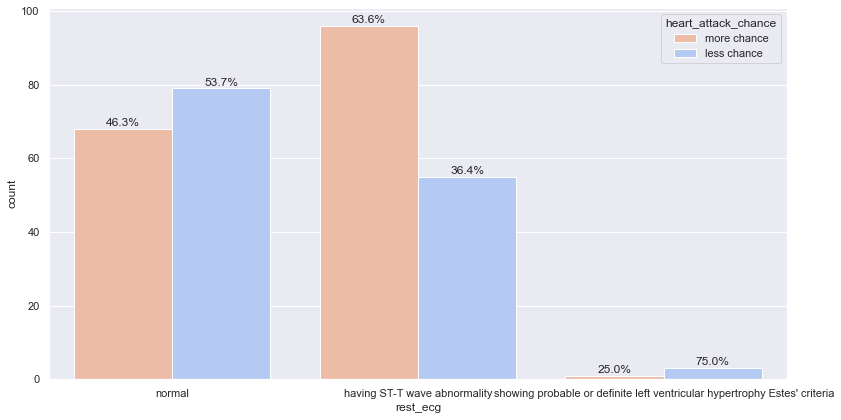

In [110]:
plt.figure(figsize = (12,6))
plotCatVar('rest_ecg',3)

- Having ST-T wave abnormality, increase the chances of having heart attack
- The sample size of showing probable or definite left ventricular hypertrophy Estes' criteria is too small to come to a conclusion of whether it affects the chances of one having a higher risk of heart attack

### 2.2.5 HeartAttack - Categorical Variables - `exercise_induced_angina`
- exercise induced angina (1 = yes; 0 = no)

<AxesSubplot:xlabel='exercise_induced_angina', ylabel='count'>

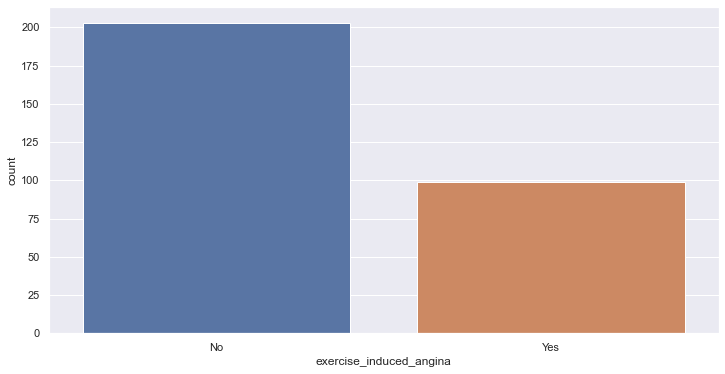

In [111]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
sb.countplot(x='exercise_induced_angina',data=heart_atk_clean_df, order = sorted(list(set(heart_atk_clean_df['exercise_induced_angina']))))

- The distribution of the exercise induced angina outcomes are not evenly distributed with more people having no exercise induced angina

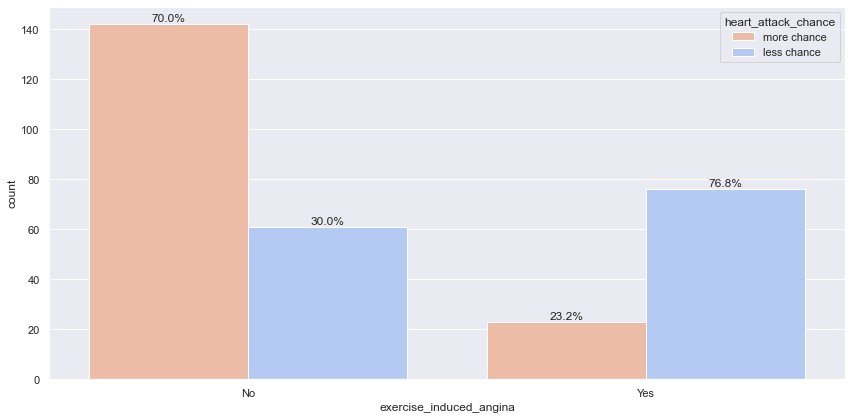

In [128]:
plt.figure(figsize = (12,6))
plotCatVar('exercise_induced_angina',2)

- We can see that those with no exercise_induced_angina have a higher chance of having a heart attack. However, this may be due to the greater proportion of people with no exercise_induced_angina in the dataset.

### 2.2.6 HeartAttack - Categorical Variables - `num_of_major_vessels`
- number of major vessels (0-4)

<AxesSubplot:xlabel='num_of_major_vessels', ylabel='count'>

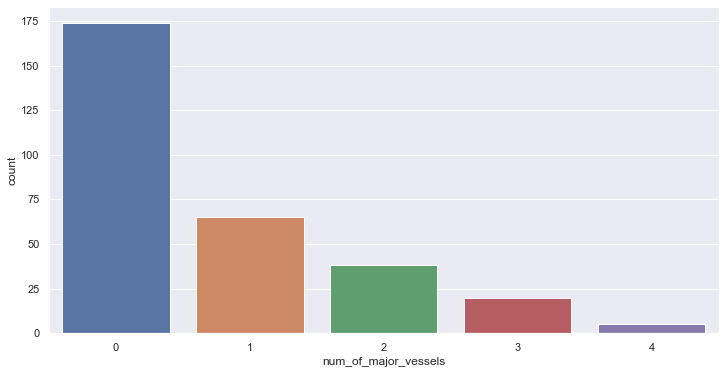

In [113]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
sb.countplot(x='num_of_major_vessels',data=heart_atk_clean_df, order = sorted(list(set(heart_atk_clean_df['num_of_major_vessels']))))

- The distribution of the number of major vessels outcomes are not evenly distributed with more people having 0 major vessels

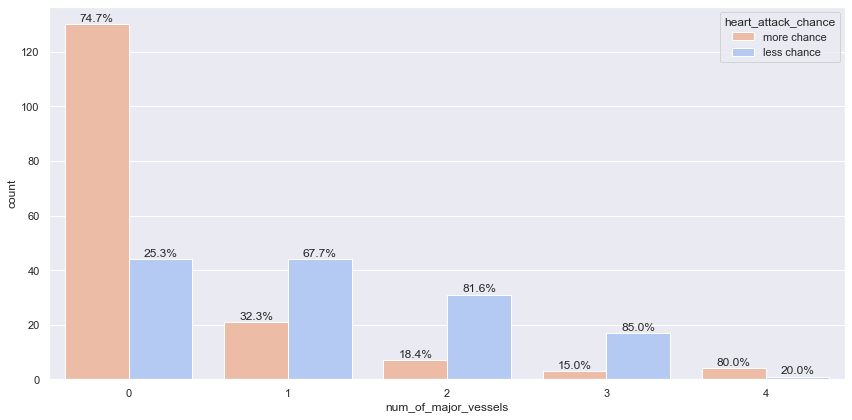

In [114]:
plt.figure(figsize = (12,6))
plotCatVar('num_of_major_vessels',5)

- When `num_of_major_vessels` is 0 or 4, the person has a high chance of heart attack. However, this may be due to the unbalanced dataset

## 2.3 HeartAttack -  `Overall Correlation`

<AxesSubplot:>

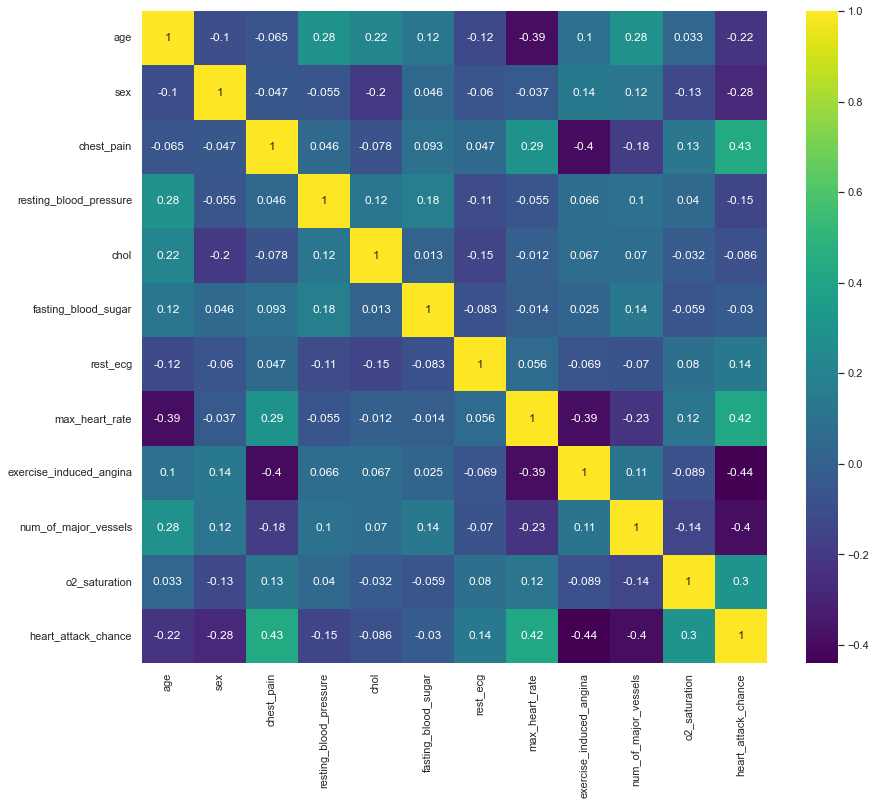

In [115]:
plt.figure(figsize = (14,12))
sb.heatmap(heart_atk_df.corr(), annot = True, cmap = 'viridis')

- The darker or brighter the colour, the stronger the correlation (here, the correlation is more on a linear level)
- For example, the correlation between max_heart_rate and age (negative correlation, -0.39) is very high.
- Variables with strong correlation
    - `age` and `max_heart_rate` (negative correlation, -0.39)
    - `heart_attack_chance` and `chest_pain` (positive correlation, 0.43)
    - `exercise_induced_angina` and `max_heart_rate` (negative correlation, -0.39)
    - `heart_attack_chance` and `max_heart_rate` (positive correlation, 0.42)
    - `chest_pain` and `exercise_induced_angina` (negative correlation, -0.4)
    - `heart_attack_chance` and `exercise_induced_angina` (negative correlation, -0.44)
    - `heart_attack_chance` and `num_of_major_vessels` (negative correlation, -0.4)


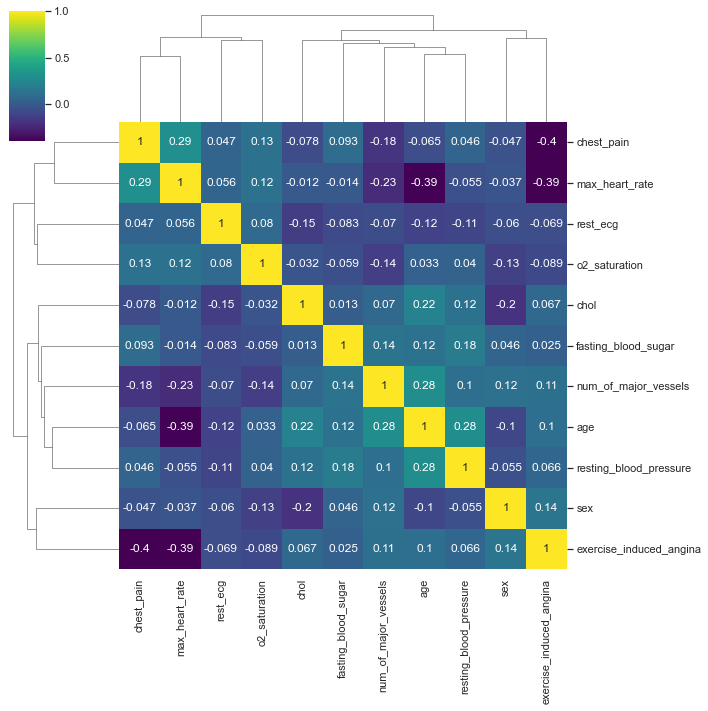

In [116]:
sb.clustermap(heart_atk_df.iloc[:,:-1].corr(), annot=True,cmap='viridis')

From the point of view of the clustering model:
- It shows the hierarchy of the variables after being clustered under the correlation perspective.
- Looking at the hierarchy from bottom to top: chest pain and maximal heart rate in one group, gender and chest rate in one group, age and number of MRI vessels in one group, and resting blood pressure and fasting glucose in one group.
- Variables in the same group mean: they are strongly correlated with each other, and variables in the same group are substitutable for each other.
